# Práctica Machine Learning

## Resumen del archivo
En este documento se encuentra el estudio y desarrollo de uno o varios modelos de Machine Learning sobre una base de datos de AirBnB siguiendo la metodología y prácticas vistas en clase de bootcamp

## Índice de contenidos
1. Instalación de paquetes
2. Cargar y limpieza de datos
3. Análisis de datos
5. Modelado
6. Conclusión


## Instalacion paquetes iniciales

In [265]:
#pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install scikit_learn
#!pip install seaborn

In [45]:
# Instalación de paquetes

#instalación numpy
import numpy as np

#importar pandas
import pandas as pd

#importar matplot
import matplotlib.pyplot as plt
%matplotlib inline

#importar sklearn
import sklearn as sk

## Cargar Datos

### Añadir csv

In [70]:
from sklearn.model_selection import train_test_split
# Incluyo dataset
airbnb = pd.read_csv("airbnb-listings-extract.csv", header=0, sep=";", decimal=".")

airbnb.head(5).T


,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [47]:
airbnb.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,...,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,...,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,...,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,...,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,...,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,...,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,...,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,...,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,...,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


### Dropear columnas no necesarias

In [48]:
# Elimino columnas que no puedo estudiar o no necesito
airbnb_drop = airbnb.drop(["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Latitude", "Longitude",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy"], axis=1)
                            

### Análisis inicial

In [49]:

#Análisis técnico inicial de las columnas
for cols in airbnb_drop.columns:
    print(f"Análisis de la columna: {cols}")
    print("Número de valores únicos:", len(airbnb_drop[cols].unique()))
    print("Filas:", airbnb_drop[cols].count())
    print("Es de tipo:", airbnb_drop[cols].dtype)
    print("Cantidad de NaN:", airbnb_drop[cols].isna().sum())
    print("Porcentaje de datos faltantes: {:.2f} %".format((airbnb_drop[cols].isna().sum() / airbnb_drop.shape[0]) * 100))
    print(airbnb_drop[cols].value_counts())
    print("-" * 40)
    

    


Análisis de la columna: Country
Número de valores únicos: 18
Filas: 14779
Es de tipo: object
Cantidad de NaN: 1
Porcentaje de datos faltantes: 0.01 %
Country
Spain             14001
United States       184
United Kingdom      159
France              110
Italy                68
Australia            46
Ireland              45
Germany              41
Austria              31
Netherlands          26
Canada               20
Belgium              17
Denmark              16
Switzerland           6
Greece                5
Hong Kong             3
Cuba                  1
Name: count, dtype: int64
----------------------------------------
Análisis de la columna: Property Type
Número de valores únicos: 22
Filas: 14780
Es de tipo: object
Cantidad de NaN: 0
Porcentaje de datos faltantes: 0.00 %
Property Type
Apartment             11962
House                  1368
Condominium             363
Bed & Breakfast         353
Loft                    305
Other                   225
Dorm                     44
G

### Label Encoder

In [50]:
#uso del label encoder para transformar los objetos

from sklearn import preprocessing
# Procesar cada columna y almacenar el LabelEncoder
for column in ["Country", "Room Type", "Property Type", "Bed Type", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication",
               "Review Scores Location", "Review Scores Value"]:
    le = preprocessing.OrdinalEncoder()
    airbnb_drop[column] = le.fit_transform(airbnb_drop[[column]])

    print(f"{column} - Total de clases: {len(le.categories_[0])}")  # Imprimir total de clases



Country - Total de clases: 18
Room Type - Total de clases: 3
Property Type - Total de clases: 22
Bed Type - Total de clases: 5
Review Scores Rating - Total de clases: 55
Review Scores Cleanliness - Total de clases: 10
Review Scores Checkin - Total de clases: 10
Review Scores Communication - Total de clases: 9
Review Scores Location - Total de clases: 9
Review Scores Value - Total de clases: 10


### Imputación

In [51]:
# Rellenamos los datos faltantes
from sklearn.impute import KNNImputer


columnas_a_imputar_knn = ["Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]


airbnb_drop[columnas_a_imputar_knn] = airbnb_drop[columnas_a_imputar_knn].apply(pd.to_numeric, errors='coerce')

# Imputar los valores faltantes
imputer = KNNImputer()
airbnb_drop[columnas_a_imputar_knn] = imputer.fit_transform(airbnb_drop[columnas_a_imputar_knn])

airbnb_drop['lat_plus_long']    = airbnb['Latitude']*airbnb['Longitude']

# Rellenar "Reviews per Month"
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].fillna(0)
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].astype(int)

airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].fillna(airbnb_drop["Bathrooms"].median())
airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].astype(int)

airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].fillna(airbnb_drop["Bedrooms"].median())
airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].astype(int)

airbnb_drop["Beds"] = airbnb_drop["Beds"].fillna(airbnb_drop["Beds"].median())
airbnb_drop["Beds"] = airbnb_drop["Beds"].astype(int)

airbnb_drop["Country"] = airbnb_drop["Country"].fillna(airbnb_drop["Country"].median())
airbnb_drop["Country"] = airbnb_drop["Country"].astype(int)

airbnb_drop.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Country,16.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.00000,13.000000,13.000000,16.00000,12.000000,2.00000,13.000000,13.000000,13.000000
Property Type,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,14.00000,0.000000,0.00000,0.000000,0.000000,0.000000
Room Type,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000
Accommodates,2.000000,4.000000,4.000000,8.000000,5.000000,6.000000,5.00000,2.000000,6.000000,6.00000,2.000000,2.00000,4.000000,4.000000,3.000000
Bathrooms,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.00000,1.000000,2.000000,2.00000,1.000000,1.00000,1.000000,1.000000,1.000000
Bedrooms,1.000000,1.000000,1.000000,3.000000,2.000000,2.000000,3.00000,1.000000,2.000000,3.00000,1.000000,1.00000,1.000000,2.000000,1.000000
Beds,1.000000,1.000000,1.000000,4.000000,2.000000,3.000000,4.00000,1.000000,3.000000,3.00000,1.000000,1.00000,1.000000,3.000000,1.000000
Bed Type,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.00000,4.000000,4.00000,4.000000,4.000000,4.000000
Price,58.000000,70.000000,70.000000,229.000000,149.000000,106.000000,52.00000,45.000000,80.000000,795.00000,100.000000,64.00000,90.000000,94.000000,115.000000
Guests Included,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.00000,1.000000,1.000000,1.00000,1.000000,1.00000,2.000000,1.000000,2.000000


## Analisis

### Histogramas

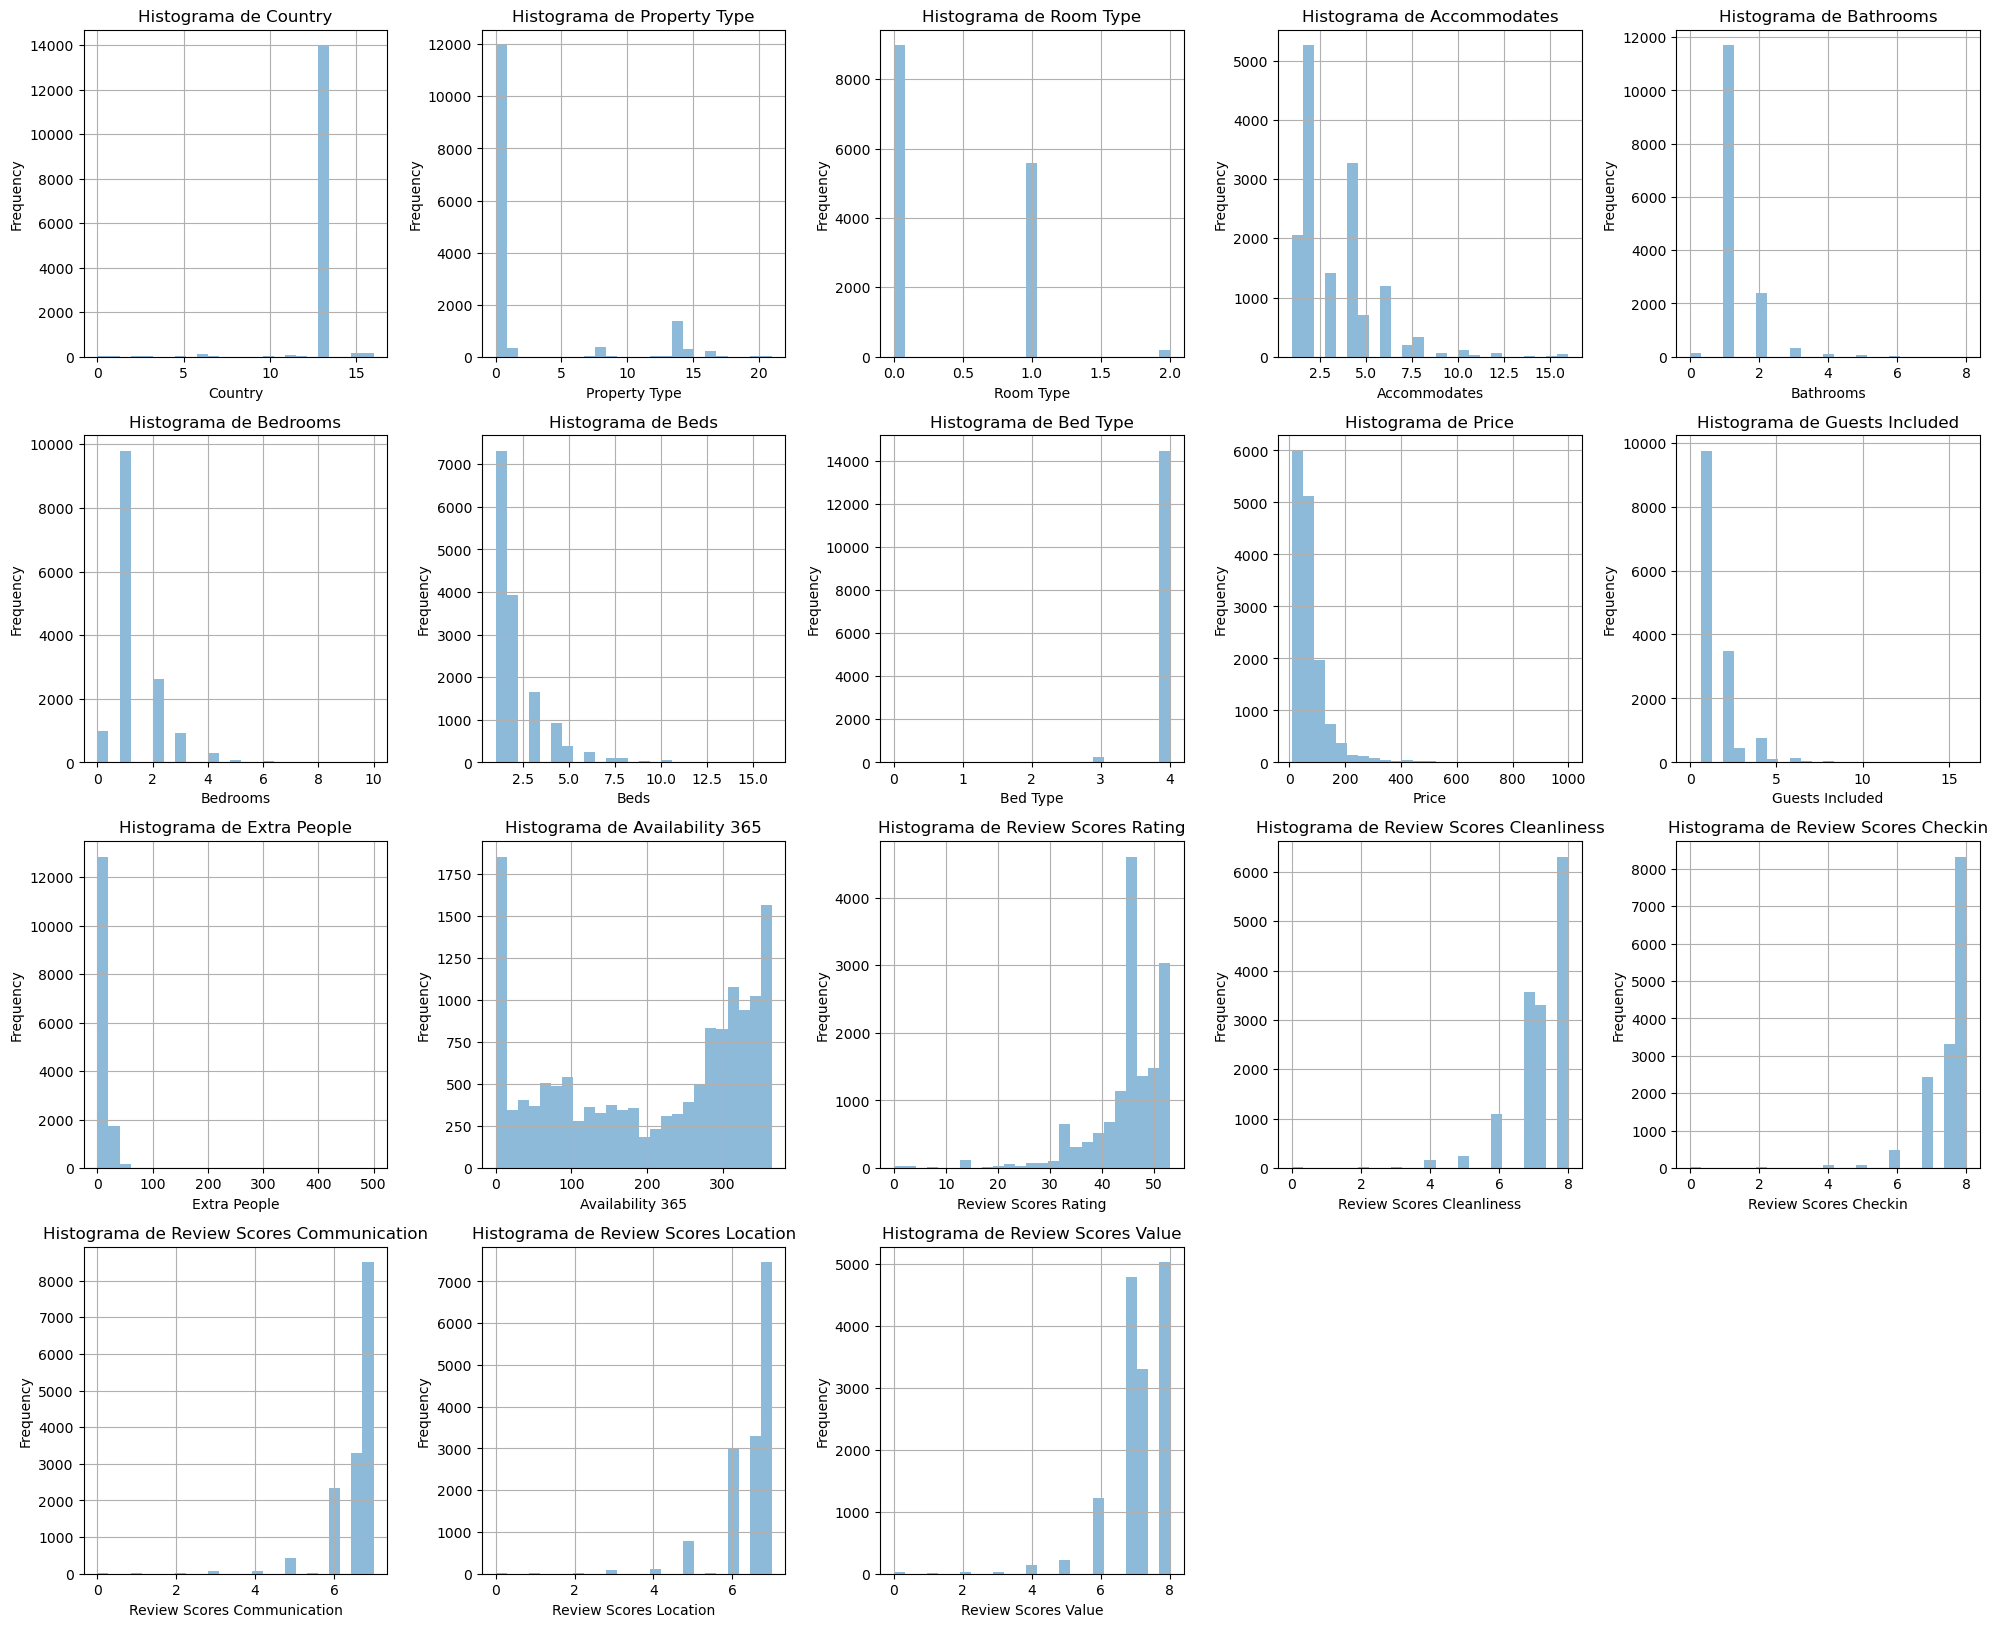

In [52]:
# Definir las columnas a graficar
columnas_a_graficar = [
    "Country", 
    "Property Type", "Room Type", "Accommodates", "Bathrooms", 
    "Bedrooms", "Beds", "Bed Type", "Price", "Guests Included", 
    "Extra People", "Availability 365", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

# Configurar la figura
plt.figure(figsize=(20, 20))

# Crear un histograma para cada columna
for i, column in enumerate(columnas_a_graficar):
    plt.subplot(5, 5, i + 1)  # Ajustar el número de filas y columnas según sea necesario
    airbnb_drop[column].plot.hist(alpha=0.5, bins=25, grid=True)
    plt.xlabel(column)
    plt.title(f'Histograma de {column}')

plt.tight_layout()  # Ajustar el espaciado entre subgráficas
plt.show()

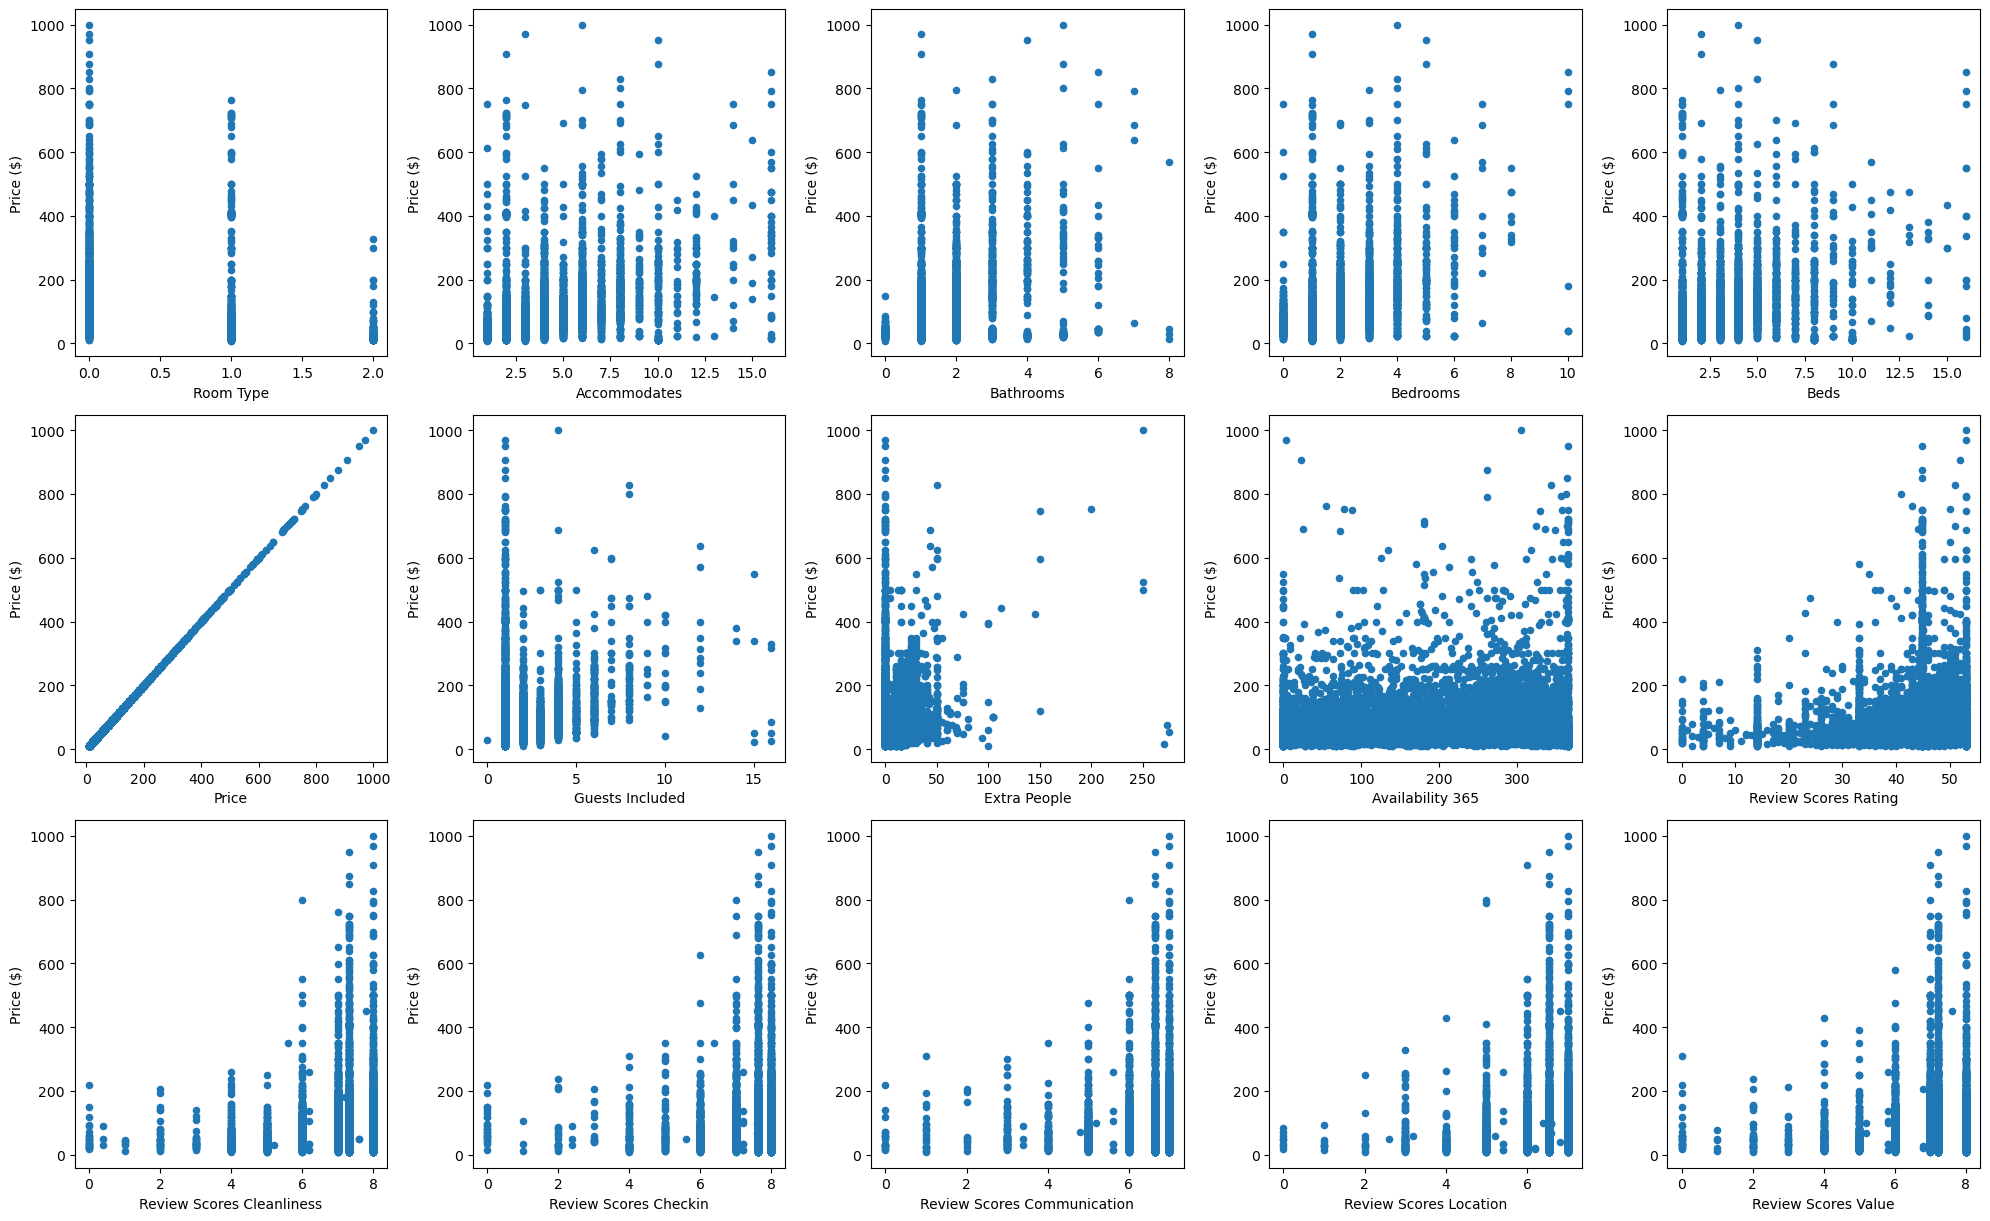

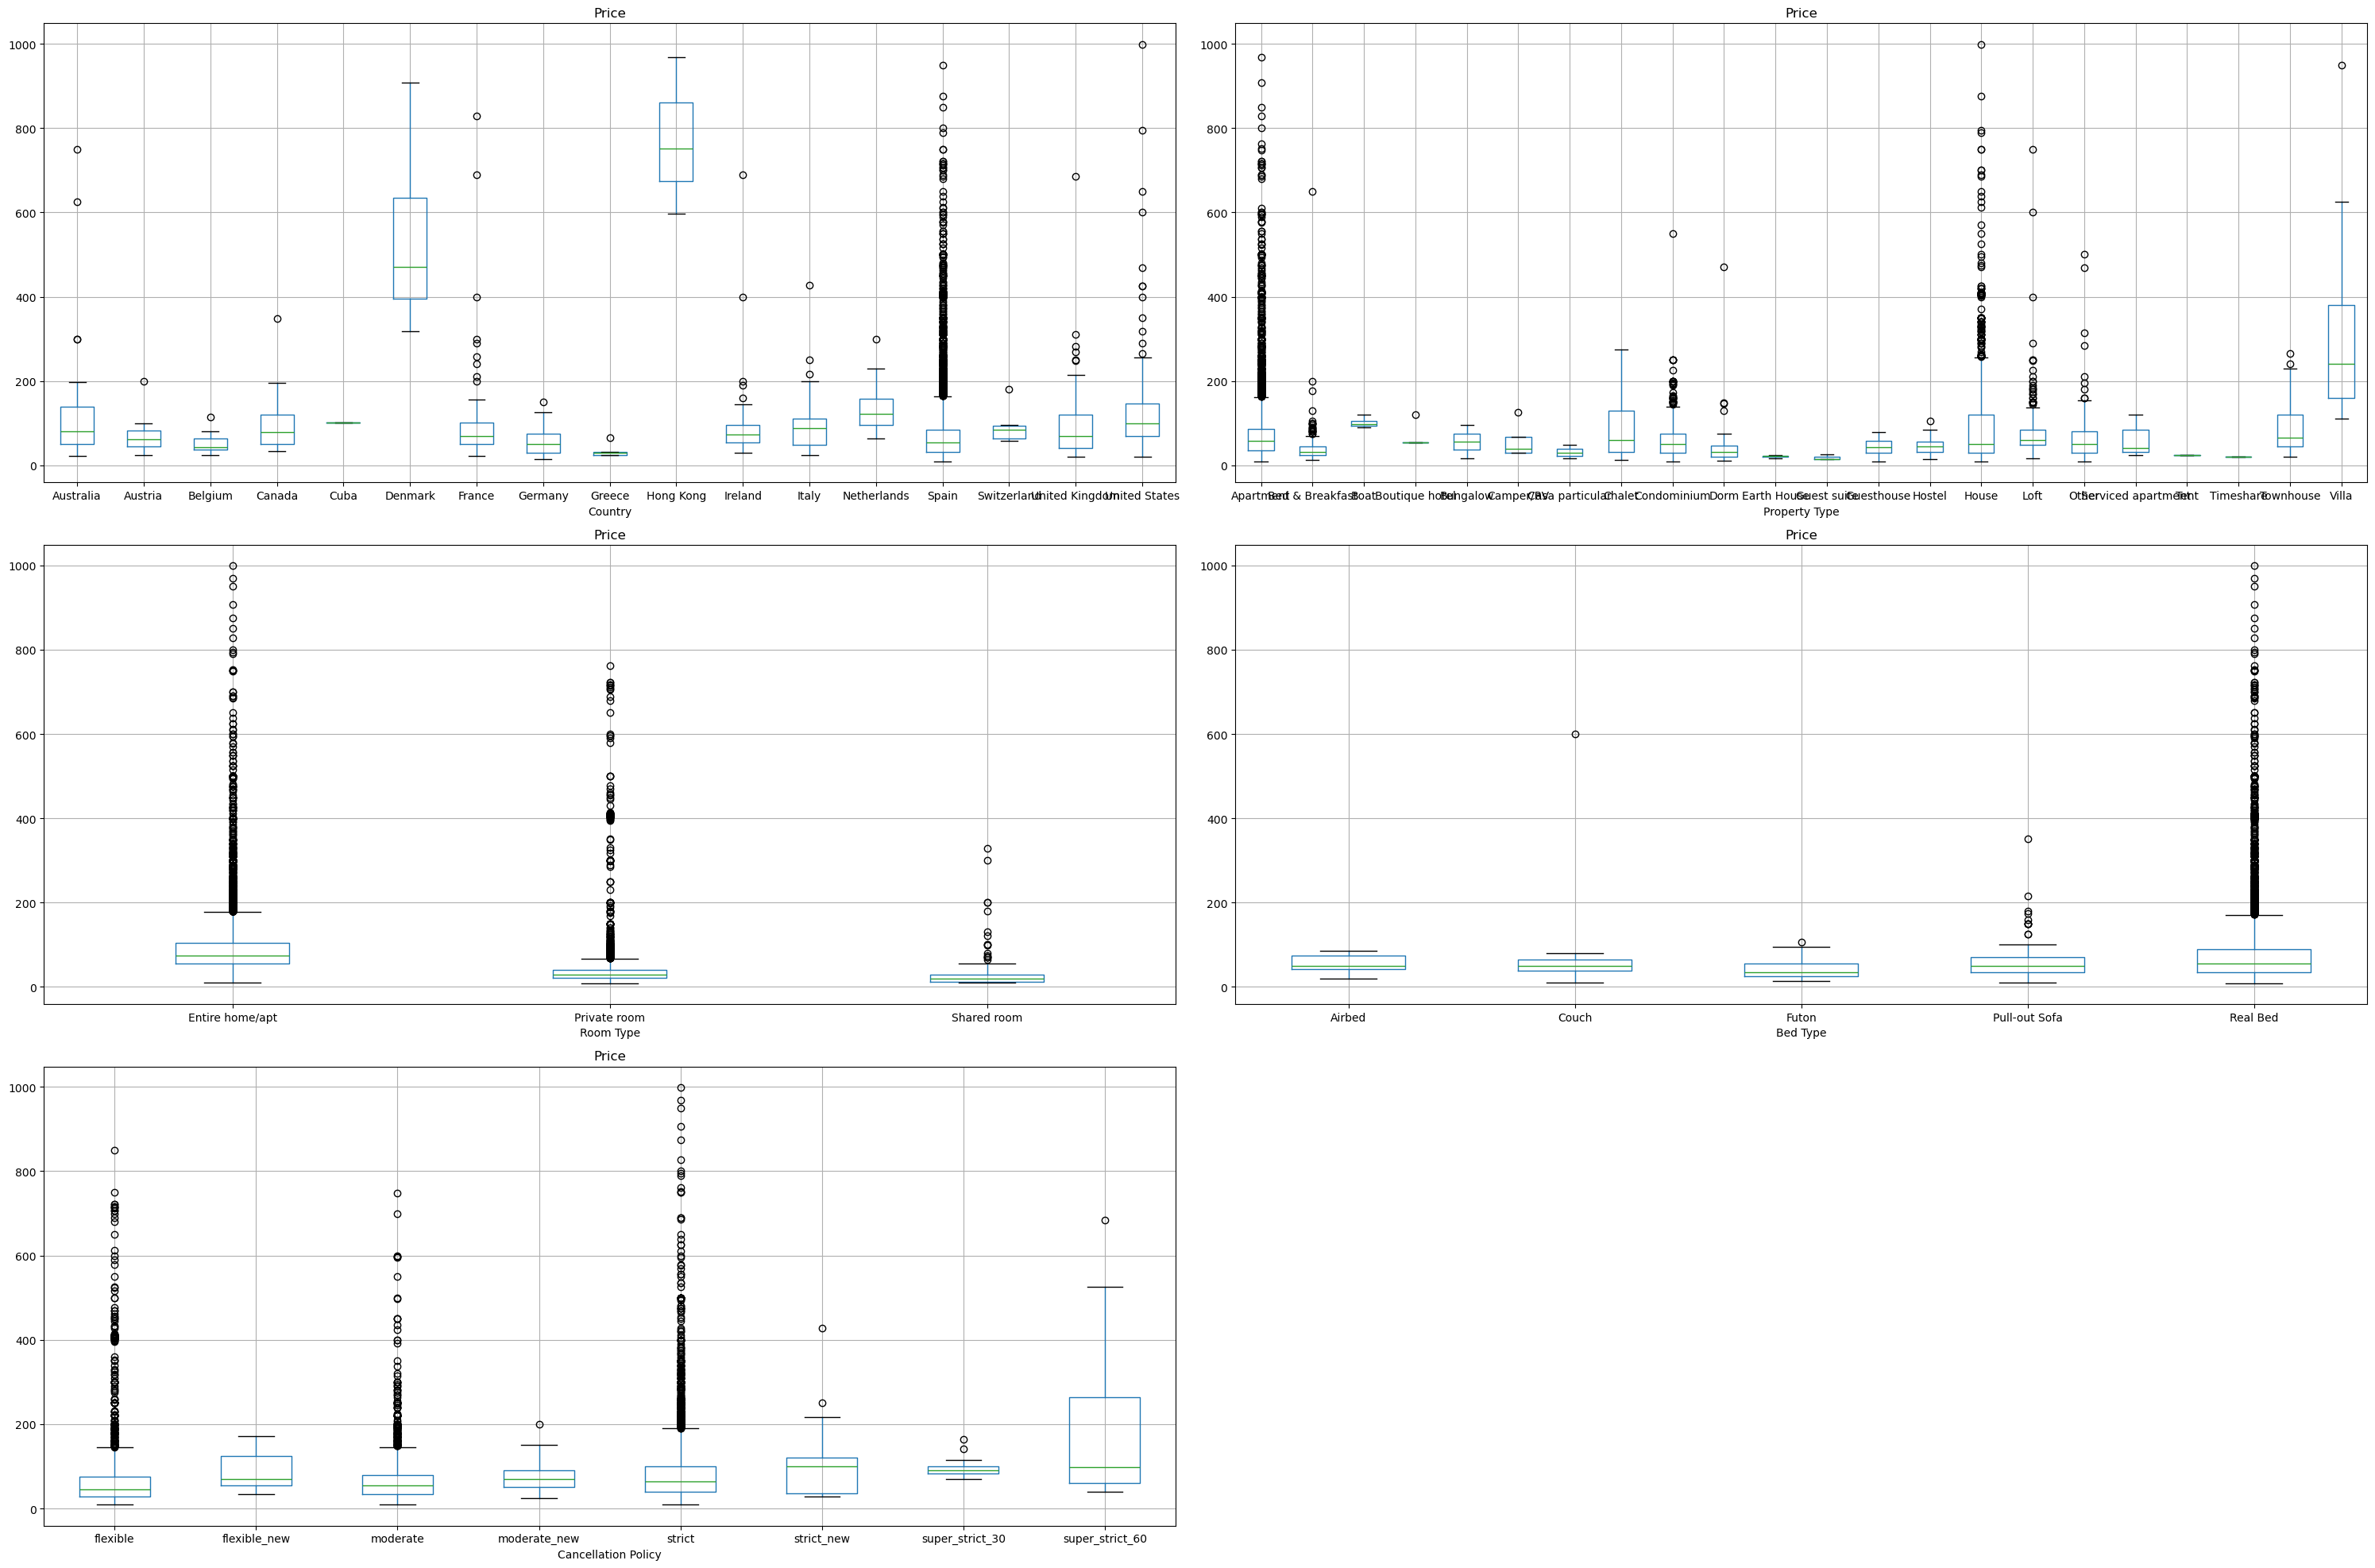

In [53]:
# Mostrar scatter plot de las variables
columnas_a_graficar = [
    "Room Type", "Accommodates", "Bathrooms", 
    "Bedrooms", "Beds", "Price", "Guests Included", 
    "Extra People", "Availability 365", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

plt.figure(figsize=(20, 20))


for i, column in enumerate(columnas_a_graficar):
    plt.subplot(5, 5, i + 1) 
    airbnb_drop.plot(kind='scatter', x=column, y='Price', ax=plt.gca()) 
    plt.xlabel(column)
    plt.ylabel('Price ($)')

plt.tight_layout()  
plt.show()  

#Mostrar boxplot de las variables categoricas
columnas_a_graficar_box = [
    "Country", 
    "Property Type", "Room Type", "Bed Type", "Cancellation Policy"
]

plt.figure(figsize=(30, 20))

for i, column in enumerate(columnas_a_graficar_box):
    plt.subplot(3, 2, i + 1) 
    airbnb.boxplot(by=column,column = 'Price', ax=plt.gca())
    plt.suptitle('')

plt.tight_layout()
plt.show()

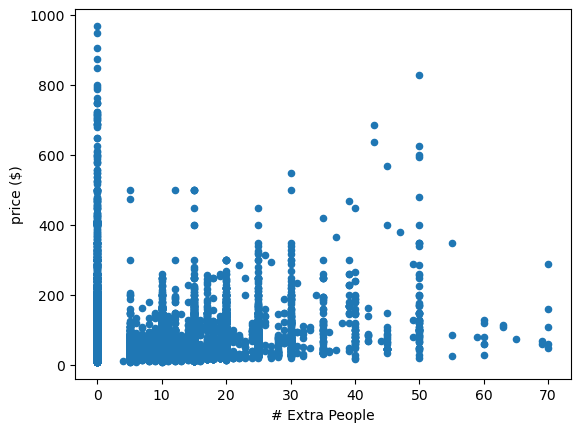

In [54]:
airbnb_no_outliers_bedrooms = airbnb_drop[airbnb_drop['Bedrooms'] <= 5]

airbnb_no_outliers_extra_people = airbnb_drop[airbnb_drop['Extra People'] <= 70]
airbnb_no_outliers_extra_people.plot(kind = 'scatter',x='Extra People',y = 'Price')
plt.xlabel('# Extra People')
plt.ylabel('price ($)')
plt.show()

In [55]:
print(
    f'Original: {airbnb_drop.shape[0]} // '
    f'Modificado: {airbnb_no_outliers_extra_people.shape[0]}\nDiferencia: {airbnb.shape[0] - airbnb_no_outliers_extra_people.shape[0]}'
)
print(f'Variación: {((airbnb_drop.shape[0] - airbnb_no_outliers_extra_people.shape[0])/airbnb_drop.shape[0])*100:2f}%')

Original: 14780 // Modificado: 14742
Diferencia: 38
Variación: 0.257104%


### Matriz de correlación

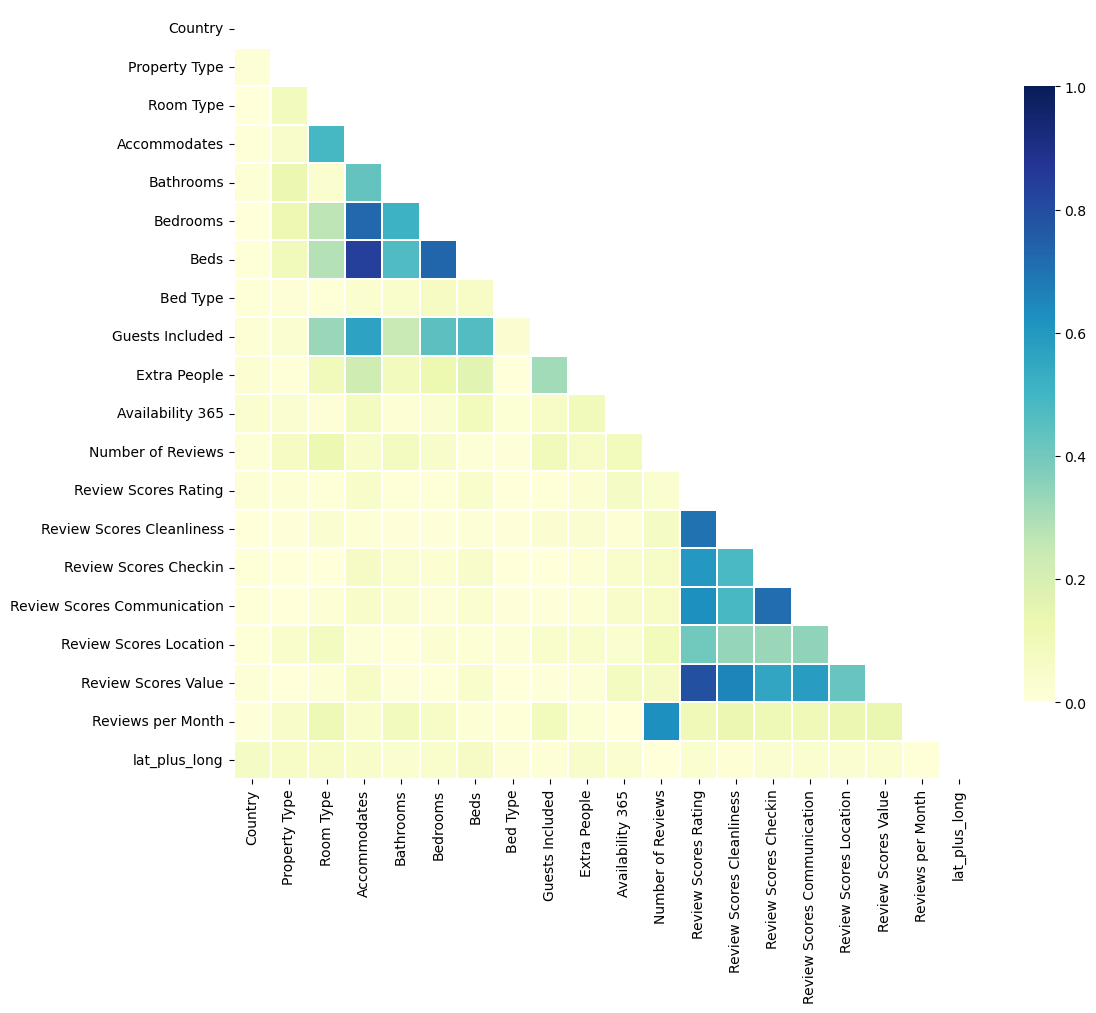

In [56]:
import seaborn as sns

# Generación de la matriz de correlación
corr = np.abs(airbnb_drop.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [57]:
airbnb_drop.corr()

,Country,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Price,Guests Included,...,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per Month,lat_plus_long
Country,1.000000,0.012679,0.001888,0.009653,0.018758,0.001969,0.009074,0.011104,-0.047272,0.019160,...,0.038514,-0.012304,-0.012423,-0.000696,-0.009642,-0.009084,0.007916,-0.014704,0.004460,0.069866
Property Type,0.012679,1.000000,0.088718,0.048900,0.131867,0.119758,0.093814,0.015297,0.086230,0.033628,...,0.031795,-0.073903,0.017720,0.004925,0.001447,-0.002632,-0.041839,0.002406,-0.054362,-0.061312
Room Type,0.001888,0.088718,1.000000,-0.491561,-0.036381,-0.265693,-0.285149,-0.009544,-0.366734,-0.331199,...,0.015557,-0.123186,0.010447,-0.034246,0.003632,-0.019276,-0.077051,0.017338,-0.112774,-0.055260
Accommodates,0.009653,0.048900,-0.491561,1.000000,0.427581,0.723412,0.837126,0.037777,0.522288,0.569527,...,0.078422,0.053389,-0.051856,-0.017533,-0.066292,-0.051069,0.013534,-0.055111,0.042874,0.051786
Bathrooms,0.018758,0.131867,-0.036381,0.427581,1.000000,0.512357,0.470312,0.043547,0.379453,0.243269,...,0.017320,-0.074712,0.011561,0.004275,-0.038488,-0.031910,0.003672,-0.006205,-0.087893,0.035618
Bedrooms,0.001969,0.119758,-0.265693,0.723412,0.512357,1.000000,0.731142,0.070503,0.498095,0.442770,...,0.033906,-0.049190,0.009076,0.006155,-0.026461,-0.011738,-0.024240,-0.010416,-0.060966,0.042220
Beds,0.009074,0.093814,-0.285149,0.837126,0.470312,0.731142,1.000000,0.058732,0.441960,0.465265,...,0.093421,0.012893,-0.041353,-0.015388,-0.049802,-0.037078,-0.018881,-0.045955,-0.015734,0.065218
Bed Type,0.011104,0.015297,-0.009544,0.037777,0.043547,0.070503,0.058732,1.000000,0.032428,0.029994,...,0.020430,-0.006973,-0.003111,0.006358,0.000585,-0.005853,-0.014887,-0.002448,-0.011115,0.015524
Price,-0.047272,0.086230,-0.366734,0.522288,0.379453,0.498095,0.441960,0.032428,1.000000,0.302348,...,0.061258,-0.058546,0.051292,0.059397,-0.006147,0.005723,0.075603,0.012854,-0.095003,-0.045404
Guests Included,0.019160,0.033628,-0.331199,0.569527,0.243269,0.442770,0.465265,0.029994,0.302348,1.000000,...,0.059002,0.095069,0.008203,0.030488,-0.000587,0.006781,0.040190,0.005016,0.090747,0.012158


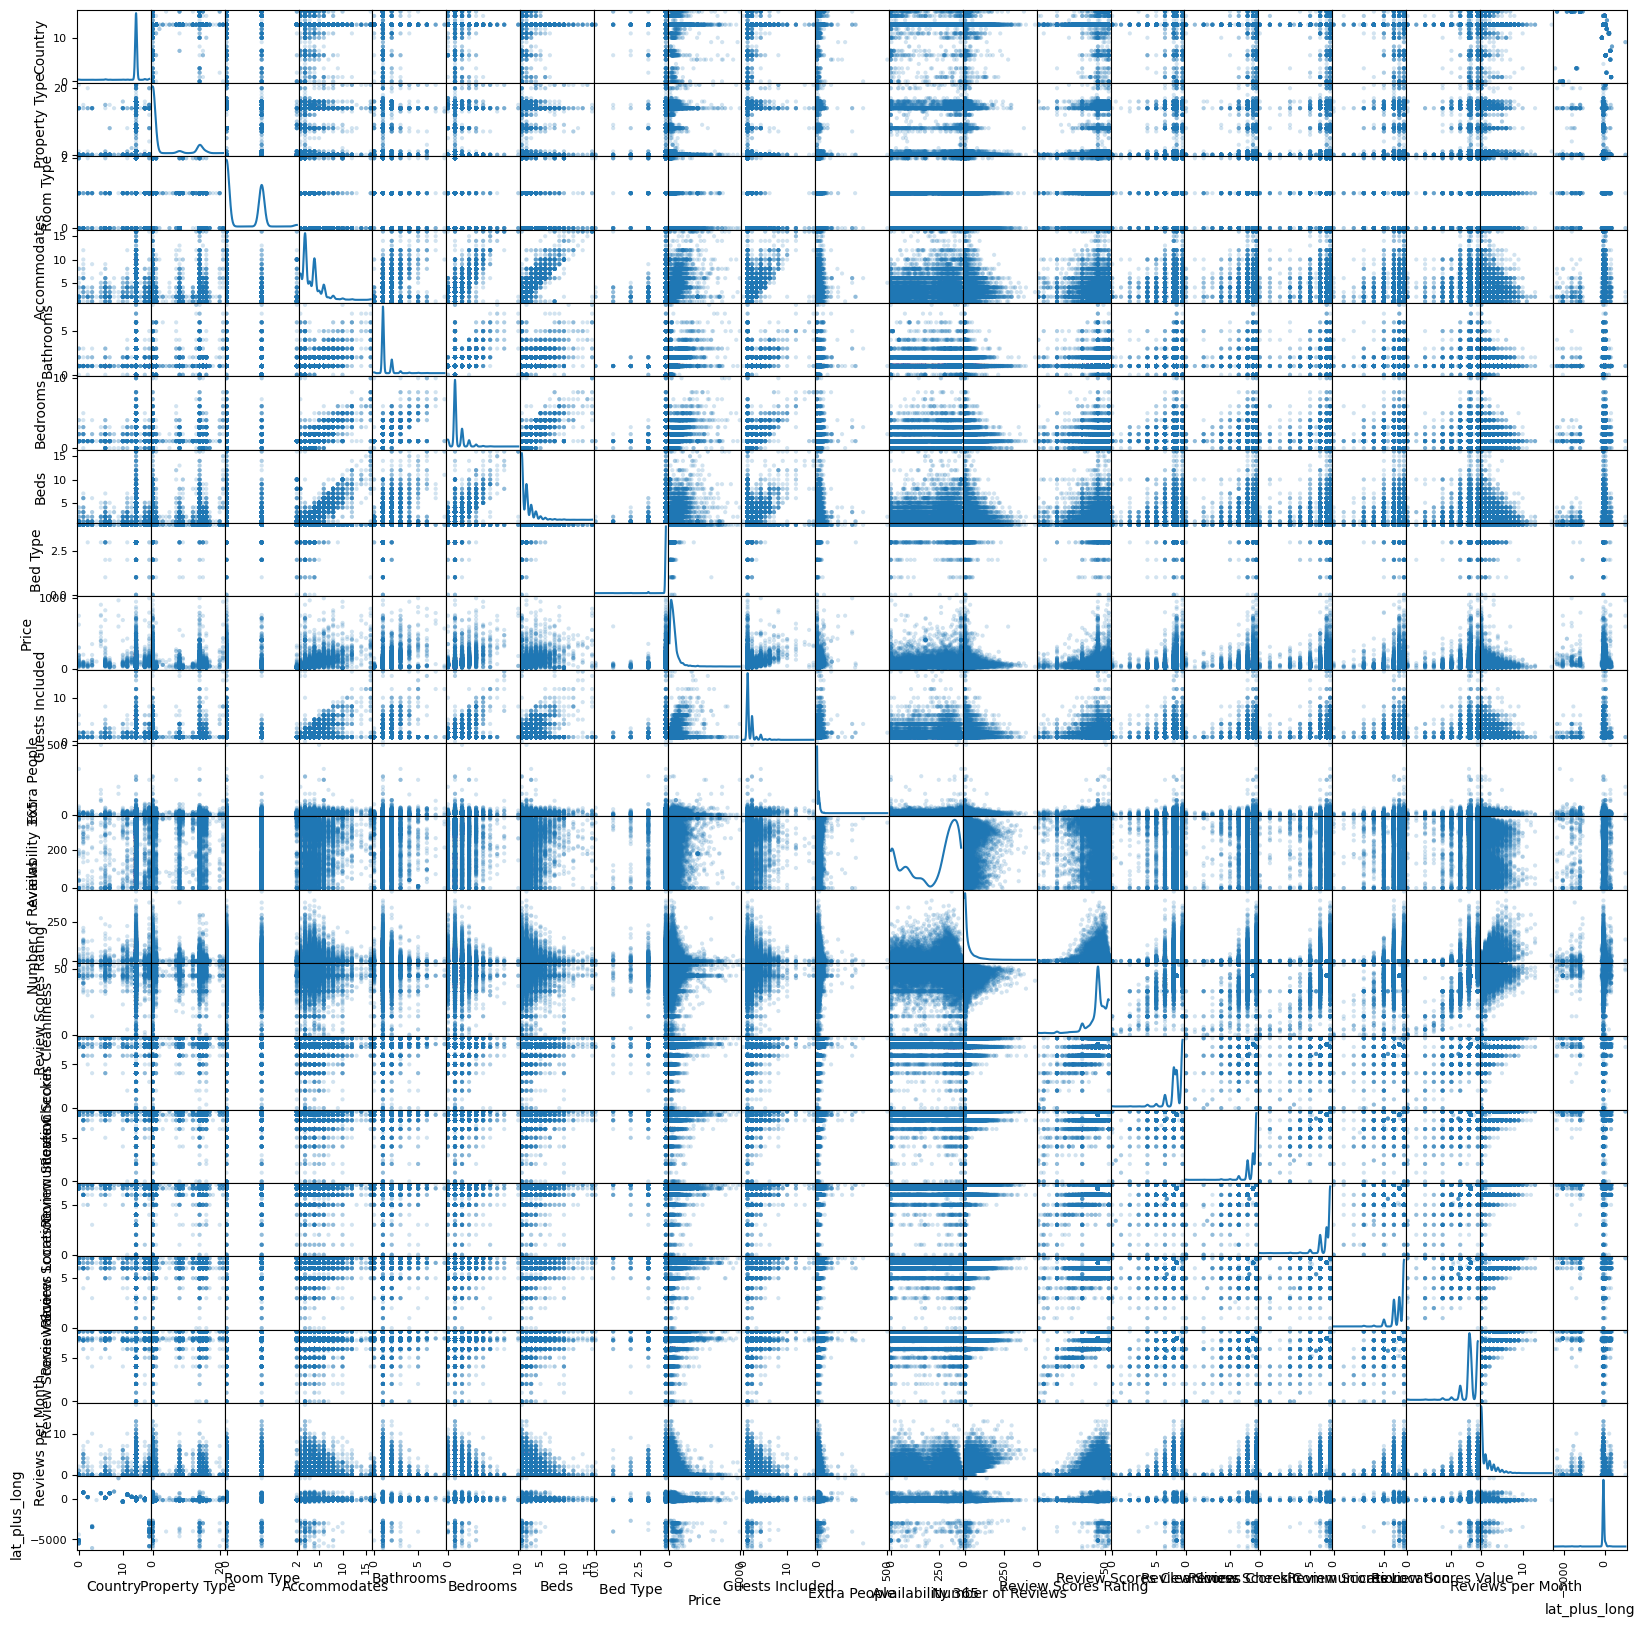

In [58]:
pd.plotting.scatter_matrix(airbnb_drop, alpha=0.2, figsize=(20, 20), diagonal = 'kde')
plt.show()

## Modelado

### Modificación de los datos

In [86]:
airbnb_drop = pd.read_csv("airbnb-listings-extract.csv", header=0, sep=";", decimal=".")

airbnb_drop = airbnb.drop(["ID", "Listing Url", "Scrape ID", "Last Scraped", "Name", "Summary", "Host URL", "Host About", "Host Response Time",
                            "Space", "Description", "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules",
                            "Thumbnail Url", "Medium Url", "Picture Url", "XL Picture Url", "Host ID", "Host Name", "Host Since",
                            "Host Location", "Host Thumbnail Url", "Host Neighbourhood", "Host Verifications", "Street",
                            "Neighbourhood", "Neighbourhood Cleansed", "State", "Country Code", "Latitude", "Longitude",
                            "Square Feet", "Weekly Price", "Monthly Price", "Has Availability", "Calendar last Scraped", "First Review",
                            "First Review", "Last Review", "License", "Jurisdiction Names", "Geolocation", "Neighbourhood",
                            "Host Picture Url", "Availability 30", "Availability 60", "Availability 90", "Review Scores Accuracy",
                            "Host Acceptance Rate", "Smart Location", "Zipcode", "City", "Amenities", "Calendar Updated", "Security Deposit",
                            "Host Listings Count", "Cleaning Fee", "Calculated host listings count", "Features", "Market", "Neighbourhood Group Cleansed",
                            "Host Response Rate", "Experiences Offered", "Minimum Nights", "Maximum Nights", "Host Total Listings Count"
                            ,"Cancellation Policy"], axis=1)

#uso del label encoder para transformar los objetos

from sklearn import preprocessing
# Procesar cada columna y almacenar el LabelEncoder
for column in ["Country", "Room Type", "Property Type", "Bed Type", "Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication",
               "Review Scores Location", "Review Scores Value"]:
    le = preprocessing.OrdinalEncoder()
    airbnb_drop[column] = le.fit_transform(airbnb_drop[[column]])  # Usar doble corchete para mantener el formato DataFrame
    
# Rellenamos los datos faltantes
from sklearn.impute import KNNImputer

# Asegúrate de que las columnas sean numéricas
columnas_a_imputar = ["Review Scores Rating", "Review Scores Cleanliness", "Review Scores Checkin", 
                       "Review Scores Communication", "Review Scores Location", "Review Scores Value"]

# Convertir las columnas a numéricas, forzando errores a NaN
airbnb_drop[columnas_a_imputar] = airbnb_drop[columnas_a_imputar].apply(pd.to_numeric, errors='coerce')

### Imputar los valores faltantes
imputer = KNNImputer()
airbnb_drop[columnas_a_imputar] = imputer.fit_transform(airbnb_drop[columnas_a_imputar])
#
## Rellenar "Reviews per Month"
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].fillna(0)
airbnb_drop["Reviews per Month"] = airbnb_drop["Reviews per Month"].astype(int)

airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].fillna(airbnb_drop["Bathrooms"].median())
airbnb_drop["Bathrooms"] = airbnb_drop["Bathrooms"].astype(int)

airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].fillna(airbnb_drop["Bedrooms"].median())
airbnb_drop["Bedrooms"] = airbnb_drop["Bedrooms"].astype(int)

airbnb_drop["Beds"] = airbnb_drop["Beds"].fillna(airbnb_drop["Beds"].median())
airbnb_drop["Beds"] = airbnb_drop["Beds"].astype(int)

airbnb_drop["Country"] = airbnb_drop["Country"].fillna(airbnb_drop["Country"].median())
airbnb_drop["Country"] = airbnb_drop["Country"].astype(int)

airbnb_drop["Price"] = airbnb_drop["Price"].fillna(airbnb_drop["Price"].mean())
airbnb_drop["Price"] = airbnb_drop["Price"].astype(int)

y= airbnb_drop["Price"]
X = airbnb_drop.drop(columns=["Price"]) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 2)

print('Datos entrenamiento: ', X_train.shape)
print('Datos test: ', X_test.shape)


Datos entrenamiento:  (11085, 19)
Datos test:  (3695, 19)


### LASSO

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................alpha=100.0; total time=   0.0s
[CV] END ........................................

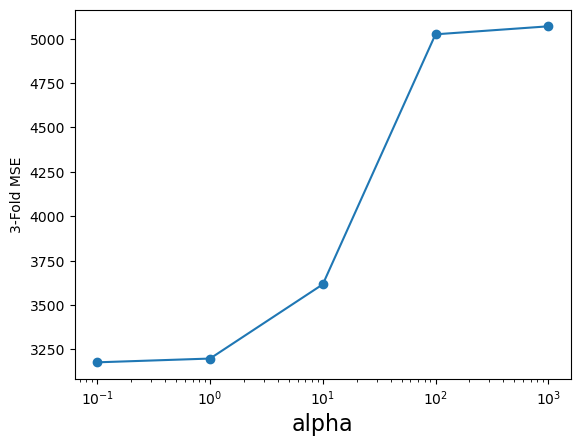

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,3,5)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))


scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(X_train,y_train)

ytrainLasso = lasso.predict(X_train)
ytestLasso  = lasso.predict(X_test)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = airbnb_drop.columns[1:] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.15e+03
MSE Modelo Lasso (test) : 3.51e+03
RMSE Modelo Lasso (train): 56.1
RMSE Modelo Lasso (test) : 59.3
Property Type -2.8923896310411186
Room Type 0.5042124283084951
Accommodates -29.241833545530557
Bathrooms 9.098684188080332
Bedrooms 19.23185672233383
Beds 14.59644370276124
Bed Type -2.644349794900185
Price 0.0
Guests Included -0.6192664039042883
Extra People 0.08490735257295565
Availability 365 0.025161198758994315
Number of Reviews -0.03737894087068802
Review Scores Rating 0.7531401113236246
Review Scores Cleanliness 2.7530016013384424
Review Scores Checkin -1.7441365380538847
Review Scores Communication -1.282040136275099
Review Scores Location 6.135927002837218
Review Scores Value -3.3247169992467502
Reviews per Month -4.13871950715332


In [83]:
from sklearn.metrics import r2_score

# Ajustar el modelo Lasso con el mejor alpha encontrado
lasso = Lasso(alpha=grid.best_params_['alpha']).fit(X_train, y_train)

# Predecir los valores para los conjuntos de entrenamiento y prueba
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calcular el R^2 para ambos conjuntos
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'R^2 (train): {r2_train:.3f}')
print(f'R^2 (test): {r2_test:.3f}')

R^2 (train): 0.379
R^2 (test): 0.367


In [65]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.1s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.1s
[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.0s
[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.0s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.1s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.0s
[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.0s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  12.3s
[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  12.1s
[CV] END ...............learning_rate=0.1, n_esti

### Bagging

Fitting 5 folds for each of 14 candidates, totalling 70 fits
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=1; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=2; total time=   0.0s
[CV] END .............................estimator__max_depth=3; total time=   0.0s
[CV] END .............................estimator_

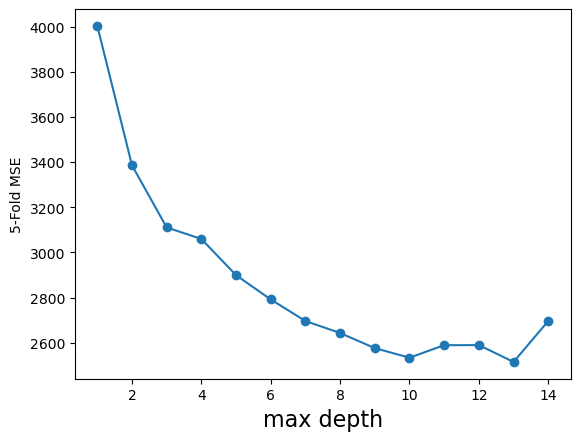

In [79]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import BaggingRegressor

max_depth_vector = range(1,15)
param_grid = {'estimator__max_depth': max_depth_vector}
grid = GridSearchCV(
    BaggingRegressor(estimator=DecisionTreeRegressor(random_state=0)),
    scoring= 'neg_mean_squared_error',
    param_grid=param_grid,
    cv = 5,
    verbose=2
).fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.plot(max_depth_vector,scores,'-o')
plt.xlabel('max depth',fontsize=16)
plt.ylabel('5-Fold MSE')
plt.show()

In [80]:
maxDepthOptimo = grid.best_params_['estimator__max_depth']
baggingModel = BaggingRegressor(
    estimator=DecisionTreeRegressor(max_depth=maxDepthOptimo),
    n_estimators=200
).fit(X_train,y_train)

print("Train: ", baggingModel.score(X_train,y_train))
print("Test: ", baggingModel.score(X_test,y_test))

Train:  0.814077357112468
Test:  0.5625316007386278


### Random Forest

Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=1; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=2; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.3s
[CV] END ........................................max_depth=3; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.4s
[CV] END ........................................max_depth=4; total time=   0.4s
[CV] END .......................................

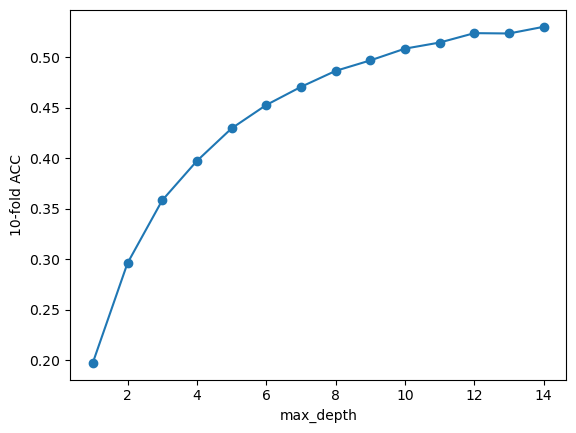

In [84]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [85]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.7902293284362183
Test:  0.5502066889382116


### Otros Boosting

In [91]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=0, max_depth=5, learning_rate=0.09, n_estimators=500)
xgb.fit(X_train,y_train)

print("Train: ",xgb.score(X_train,y_train))
print("Test: ",xgb.score(X_test,y_test))

Train:  0.8058659607377074
Test:  0.5716465320817556


In [92]:
from lightgbm import LGBMRegressor

gbm = LGBMRegressor(random_state=0, max_depth=5,learning_rate=0.09, n_estimators=500)
gbm.fit(X_train,y_train)

print("Train: ",gbm.score(X_train,y_train))
print("Test: ",gbm.score(X_test,y_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 701
[LightGBM] [Info] Number of data points in the train set: 11085, number of used features: 19
[LightGBM] [Info] Start training from score 73.284980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

### SVR

In [102]:
from sklearn.svm import SVR

# Paso 2:
vectorC = np.logspace(-2, 2, 10)
vectorG = np.logspace(-5, 1, 8)

param_grid = {'C': vectorC, 'gamma':vectorG}
grid = GridSearchCV(SVR(kernel='rbf'), param_grid=param_grid, cv = 5, verbose=2)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.5s
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.8s
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.4s
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.2s
[CV] END ................................C=0.01, gamma=1e-05; total time=   5.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.4s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.3s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.1s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.2s
[CV] END ................C=0.01, gamma=7.196856730011514e-05; total time=   5.1s
[CV] END ................C=0.01, gamma=0.0005179474679231213; total time=   5.1s
[CV] END ................C=0.01, gamma=0.000517

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 2.78255940e-02, 7.74263683e-02, 2.15443469e-01,
       5.99484250e-01, 1.66810054e+00, 4.64158883e+00, 1.29154967e+01,
       3.59381366e+01, 1.00000000e+02]),
                         'gamma': array([1.00000000e-05, 7.19685673e-05, 5.17947468e-04, 3.72759372e-03,
       2.68269580e-02, 1.93069773e-01, 1.38949549e+00, 1.00000000e+01])},
             verbose=2)

In [110]:
# Paso 3:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmModel = SVR(kernel='rbf',gamma = Gopt, C = Copt).fit(X_train,y_train)
print(f'Acc (TEST): {svmModel.score(X_test,y_test):0.2f}')

Acc (TEST): 0.33


## Resumen

### Valores de los modelos

In [111]:
print("Scoring de los modelos usados")
print("-"*40)
print("Lasso")
print(f'R^2 (train): {r2_train:.3f}')
print(f'R^2 (test): {r2_test:.3f}')
print("-"*40)
print("Bagging")
print("Train: ", baggingModel.score(X_train,y_train))
print("Test: ", baggingModel.score(X_test,y_test))
print("-"*40)
print("RandomForest")
print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))
print("-"*40)
print("XGBoost")
print("Train: ",xgb.score(X_train,y_train))
print("Test: ",xgb.score(X_test,y_test))
print("-"*40)
print("LightGBM")
print("Train: ",gbm.score(X_train,y_train))
print("Test: ",gbm.score(X_test,y_test))
print("-"*40)
print("SVR")
print(f'Acc (TEST): {svmModel.score(X_test,y_test):0.2f}')

Scoring de los modelos usados
----------------------------------------
Lasso
R^2 (train): 0.379
R^2 (test): 0.367
----------------------------------------
Bagging
Train:  0.814077357112468
Test:  0.5625316007386278
----------------------------------------
RandomForest
Train:  0.7902293284362183
Test:  0.5502066889382116
----------------------------------------
XGBoost
Train:  0.8058659607377074
Test:  0.5716465320817556
----------------------------------------
LightGBM
Train:  0.7190297358555799
Test:  0.5521254731269116
----------------------------------------
SVR
Acc (TEST): 0.33


Los mejores modelos son Bagging y XGBoost por otro lado SVR y Lasso me dan calificaciones bastante mediocres.